# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#len(lats)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count =1 
csv_path = "/Users/mouni/Documents/weather.csv"
output_path = "/Users/mouni/Documents/weather_output.csv"

if os.path.isfile(output_path):
    os.system("rm -rf %s" %(output_path))
with open(output_path,'a') as out:
    out.write("City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed\n")
    
    for city in cities:
    
        query_url = f"{base_url}appid={api_key}&units={units}&q={city}"
  
        print (f"Processing number {count} city name: {city}")
        try:
            response = requests.get(query_url).json()
            lat = response['coord']['lat']
            lng = response['coord']['lon']
            temp = response['main']['temp_max']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            windspeed = response['wind']['speed']
            country = response['sys']['country']
            date = response['dt']
            out.write(f"{city},{cloudiness},{country},{date},{humidity},{lat},{lng},{temp},{windspeed}\n")
            #print (f"latitude : {lat}, temperature : {temp}") 
            count = count + 1
        except (KeyError, IndexError):
            print("city not found... skipping.")
        

Processing number 1 city name: barrow
Processing number 2 city name: mataura
Processing number 3 city name: ust-maya
Processing number 4 city name: atuona
Processing number 5 city name: port elizabeth
Processing number 6 city name: port alfred
Processing number 7 city name: busselton
Processing number 8 city name: shimoda
Processing number 9 city name: shu
Processing number 10 city name: kapaa
Processing number 11 city name: lavrentiya
Processing number 12 city name: dikson
Processing number 13 city name: tiksi
Processing number 14 city name: khatanga
Processing number 15 city name: mys shmidta
city not found... skipping.
Processing number 15 city name: qaanaaq
Processing number 16 city name: nikolskoye
Processing number 17 city name: castro
Processing number 18 city name: sao filipe
Processing number 19 city name: fortuna
Processing number 20 city name: mendeleyevsk
Processing number 21 city name: albany
Processing number 22 city name: saint-philippe
Processing number 23 city name: ko

Processing number 168 city name: mehamn
Processing number 169 city name: kalemie
Processing number 170 city name: upernavik
Processing number 171 city name: taitung
Processing number 172 city name: vanimo
Processing number 173 city name: vostok
Processing number 174 city name: palabuhanratu
city not found... skipping.
Processing number 174 city name: remedios
Processing number 175 city name: kazalinsk
city not found... skipping.
Processing number 175 city name: thinadhoo
Processing number 176 city name: berbera
city not found... skipping.
Processing number 176 city name: harper
Processing number 177 city name: bilopillya
Processing number 178 city name: codrington
Processing number 179 city name: kaeo
Processing number 180 city name: faya
Processing number 181 city name: paciran
Processing number 182 city name: ulladulla
Processing number 183 city name: manchester
Processing number 184 city name: stephenville
Processing number 185 city name: torbay
Processing number 186 city name: seou

Processing number 331 city name: byron bay
Processing number 332 city name: lukovetskiy
Processing number 333 city name: mayor pablo lagerenza
Processing number 334 city name: mahuva
Processing number 335 city name: amontada
Processing number 336 city name: la ronge
Processing number 337 city name: kohat
Processing number 338 city name: henties bay
Processing number 339 city name: termoli
Processing number 340 city name: norman wells
Processing number 341 city name: metkovic
Processing number 342 city name: saint-augustin
Processing number 343 city name: fare
Processing number 344 city name: jieshi
Processing number 345 city name: diamantino
Processing number 346 city name: alice springs
Processing number 347 city name: deniliquin
Processing number 348 city name: bariri
Processing number 349 city name: bokspits
city not found... skipping.
Processing number 349 city name: talcahuano
Processing number 350 city name: dicabisagan
Processing number 351 city name: shelburne
Processing number

Processing number 488 city name: ulkan
Processing number 489 city name: ewo
Processing number 490 city name: usinsk
Processing number 491 city name: manggar
Processing number 492 city name: port hedland
Processing number 493 city name: sayat
Processing number 494 city name: sfantu gheorghe
Processing number 495 city name: princeton
Processing number 496 city name: jasper
Processing number 497 city name: madera
Processing number 498 city name: maracas
Processing number 499 city name: tottori
Processing number 500 city name: koslan
Processing number 501 city name: cooma
Processing number 502 city name: campobasso
Processing number 503 city name: marrakesh
Processing number 504 city name: fort myers beach
Processing number 505 city name: naze
Processing number 506 city name: vila do maio
Processing number 507 city name: turayf
Processing number 508 city name: keningau
Processing number 509 city name: starosubkhangulovo
Processing number 510 city name: harbin
Processing number 511 city nam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.read_csv(output_path)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,barrow,20,AR,1544316260,31,-38.31,-60.23,27.24,8.37
1,mataura,92,NZ,1544316309,89,-46.19,168.86,18.47,6.42
2,ust-maya,44,RU,1544316310,39,60.42,134.54,-32.24,0.97
3,atuona,20,PF,1544316310,100,-9.80,-139.03,26.42,7.67
4,port elizabeth,1,US,1544313360,68,39.31,-74.98,1.10,2.10


In [13]:
weather_df = weather_df.dropna(how='any')
weather_df.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind speed    527
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

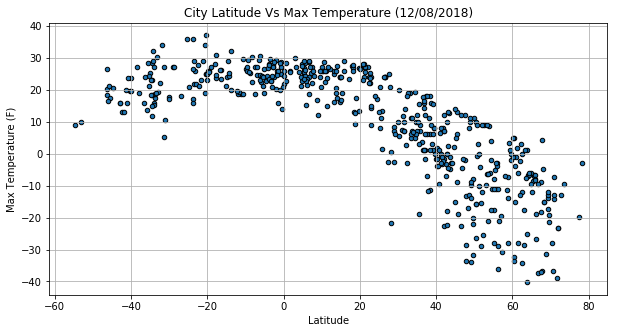

In [28]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp",edgecolors="black", grid=True, figsize=(10,5),
              title="City Latitude Vs Max Temperature (12/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

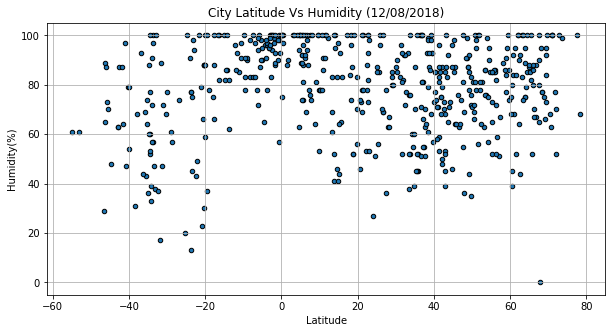

In [29]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity",edgecolors="black", grid=True, figsize=(10,5),
              title="City Latitude Vs Humidity (12/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

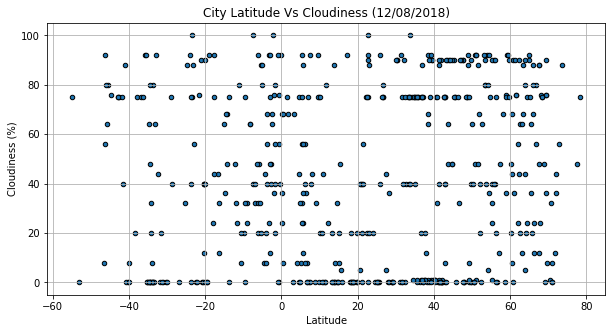

In [30]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",edgecolors="black", grid=True, figsize=(10,5),
              title="City Latitude Vs Cloudiness (12/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

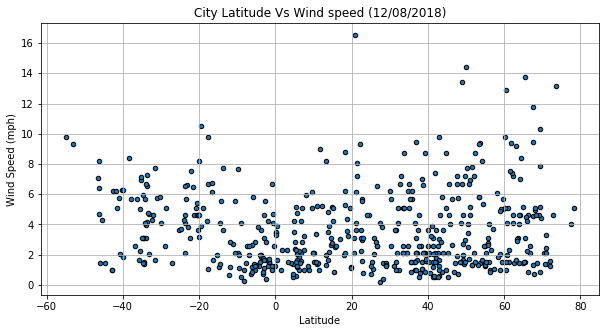

In [31]:
weather_df.plot(kind="scatter", x="Lat", y="Wind speed",edgecolors="black", grid=True, figsize=(10,5),
              title="City Latitude Vs Wind speed (12/08/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Windspeed.png")
plt.show()